In [114]:
import numpy as np
import scipy.signal as sp
from scipy.signal import freqz
from matplotlib.pylab import *
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from IPython.display import Audio

#1.1. Procedimiento
1) Implemente un filtro FIR con las siguientes caracteríticas, de acuerdo a su  ́ultimo número de cédula:
cc=2
filtro rechaza banda


In [115]:
# Filtro rechaza-banda
fc1 = 1000
fc2 = 4000
fs = 16000 # frec de muestreo
BW = 200 #Ganancia del filtro en decibeles
AdB = 0
N = 1024 # Numero de puntos de la FFT

wc1 = (2*np.pi*fc1)/fs # frecuencia de corte normalizada en radianes
wc2 = (2*np.pi*fc2)/fs
bwn = (2*np.pi*BW)/fs

M = int(4/bwn) # orden estimado del filtro
print(f'El orden del filtro es: {M}')
n = np.arange(-M, M)

El orden del filtro es: 50


In [116]:
h1 = (wc1/np.pi)*np.sinc(wc1*n/np.pi)-(wc2/np.pi)*np.sinc(wc2*n/np.pi) # Respuesta del filtro ideal

#Trunca
h1[n==0]=1-(wc2-wc1)/np.pi

In [117]:
ventana1 = np.hamming(len(n))


w1,Hh1 = sp.freqz(h1,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal

Ventana=0.5*(1+np.cos((2*np.pi*n)/(M-1))) # Se elimina el fenómeno de Gibbs con ventana Hanning

h2 = h1*ventana1 # Multiplico la respuesta ideal por la ventana

A = np.sqrt(10**(0.1*AdB))
h2=h2*A # Ganancia del filtro
w2,Hh2 = sp.freqz(h2,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

**1.1.2** Grafique la respuesta al impulso del filtro asignado (hx de acuerdo con la notación usada).

**1.1.3** Grafique la respuesta al impulso del filtro asignado luego de aplicarle una ventana Hamming.

**1.1.4** Grafique la respuesta en frecuencia para el filtro asignado sin truncar y el truncado a partir de la ventana Hamming.

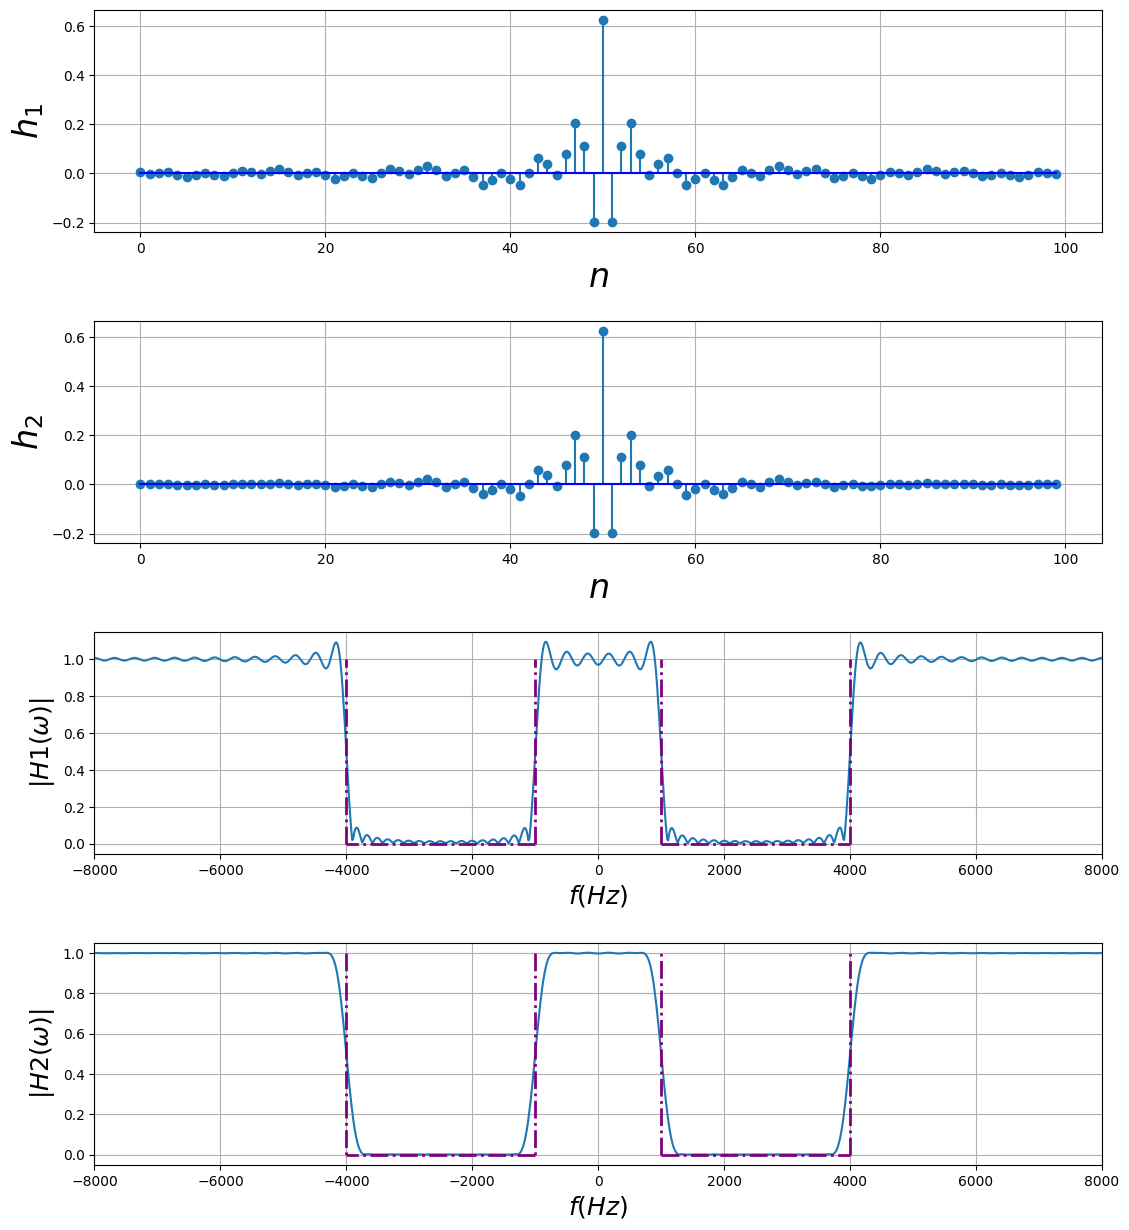

In [118]:
fig1,axs1 = subplots(4,1)
fig1.set_size_inches((13,15))
subplots_adjust(hspace=0.4)

ax=axs1[0]
ax.stem(n+M,h1,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_1$",fontsize=24)


ax=axs1[1]
ax.stem(n+M,h2,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_2$",fontsize=24)

ax=axs1[2]
ax.plot((w1-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh1)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.vlines([fc1,fc2],0,1,color='purple',lw=2.,linestyle='-.')
ax.hlines(0,fc1,fc2,color='purple',lw=2.,linestyle='-.')
ax.vlines([-fc1,-fc2],0,1,color='purple',lw=2.,linestyle='-.')
ax.hlines(0,-fc1,-fc2,color='purple',lw=2.,linestyle='-.')
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

ax=axs1[3]
ax.plot((w2-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh2)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.vlines([fc1,fc2],0,1,color='purple',lw=2.,linestyle='-.')
ax.hlines(0,fc1,fc2,color='purple',lw=2.,linestyle='-.')
ax.vlines([-fc1,-fc2],1,0,color='purple',lw=2.,linestyle='-.')
ax.hlines(0,-fc1,-fc2,color='purple',lw=2.,linestyle='-.')
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H2(\omega)| $",fontsize=18)
for ax in axs1:
    ax.grid(True)

plt.show()

1.2¿Qué puede observar? se observa que empieza a tender a cero después de un tiempo finito, lo cual confirma el hecho de que es un filtro FIR y que se tendrá risado al hacer la respuesta en frecuencia debido a sus rápidas variaciones o discontinuidades presentes en esta respuesta al impulso.


**1.3 ¿Qué diferencia se puede observar respecto a la anterior gráfica?**
 Aplicando la ventana se obtiene el resultado esperado según la teoría, se espera que en los bordes de la ventana la señal este atenuada

 **1.4 ¿Qué puede observar?**
Filtro sin truncar: Su respuesta en frecuencia muestra el comportamiento esperado del filtro rechaza banda, con frecuencias de corte en 1000 Hz y 4000 Hz además de presentar el fenómeno de Gibbs debido a las discontinuidades en los bordes.

Filtro truncado a partir de la ventana: Se logra prácticamente eliminar el rizado, solo se aprecian unas pequeñas curvas en las subidas y bajadas de la señal. Esto es debido al comportamiento ya mencionado de la ventana, la cual permite que los bordes se atenúen.por lo que claramente se ve que es un rechazabandas

#2. Filtrado de música con filtros FIR

#2.1
Escriba un programa que grafique la señal correspondiente al  ́ultimo número de su cédula. Recuerde,
normalizar la señal en amplitud, eliminar su nivel DC y crear su vector de tiempo dependiendo de la
frecuencia de muestreo.

Fs : 44100


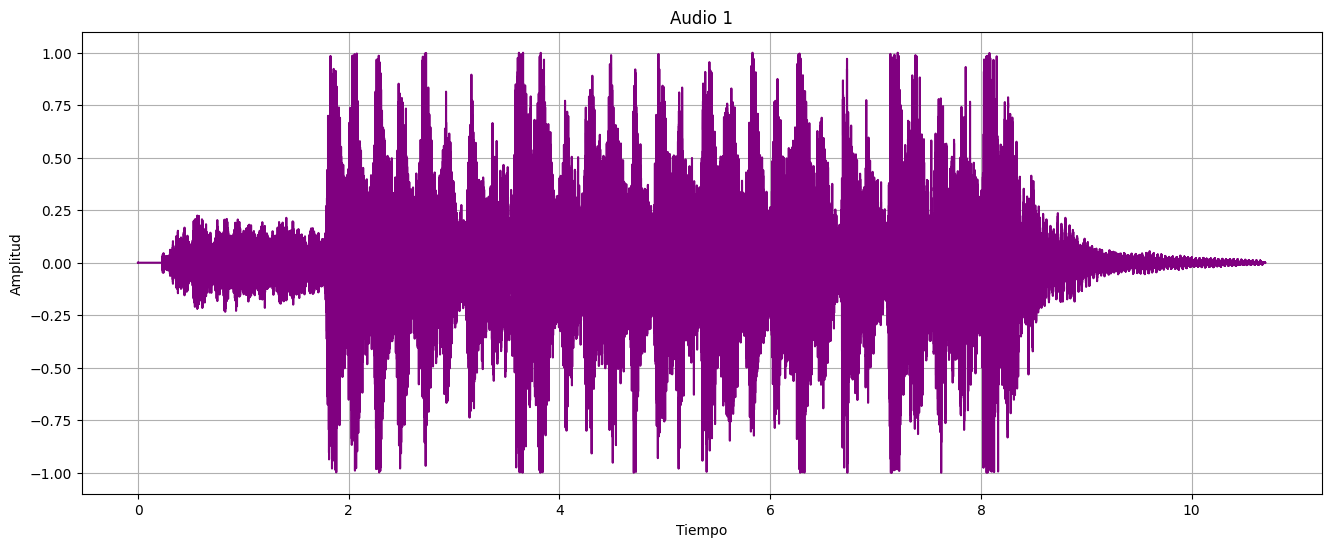

In [126]:
file_audio="audio3.wav" # Se selecciona el archivo a abrir.
fs1, audio=read(file_audio) # Se extrae la Fs y el contenido del audio.
norm = audio/np.max(np.abs(audio)) # Se normaliza el audio
norm=norm-np.mean(norm)
print("Fs : {}".format(fs1))
t=np.arange(0,float(len(norm))/fs1,1.0/fs1)

plt.figure(figsize=(16,6))
plt.plot(t,norm,color='purple')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Audio 1")
plt.grid()
plt.show()
Audio(norm, rate=fs1)

#2.2
¿Qué instrumentos logra escuchar en el audio seleccionado?

cascabeles,campanas, piano, triangulo, tambores y violin.

#2.3
Diseñe un filtro FIR pasa-bajas Diseñe un filtro FIR pasa-bajas con una banda de transición de 200 Hz, una frecuencia de corte de
600 Hz y un ripple de 60 dB.

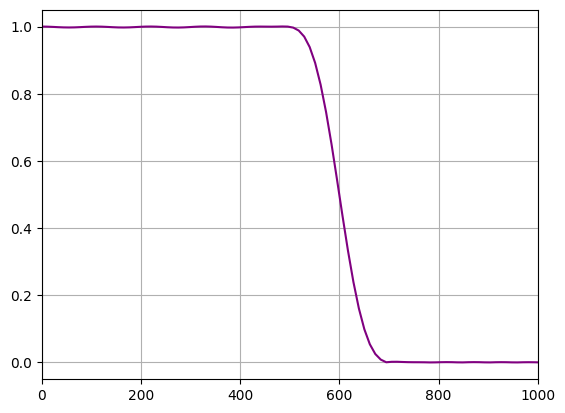

In [137]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
nyq_rate = fs1 / 2.0
roll_off = 200.0
cutoff_hz = 600.0
width = roll_off/nyq_rate
ripple_db = 60.0 #The desired attenuation in the stop band, in dB.
N,_= kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, pass_zero='lowpass')
w, h = freqz(taps, [1], worN=2000)
plt.plot(nyq_rate*w/np.pi, np.abs(h),color='purple')
plt.xlim([0, 1000])
plt.grid()
plt.show()


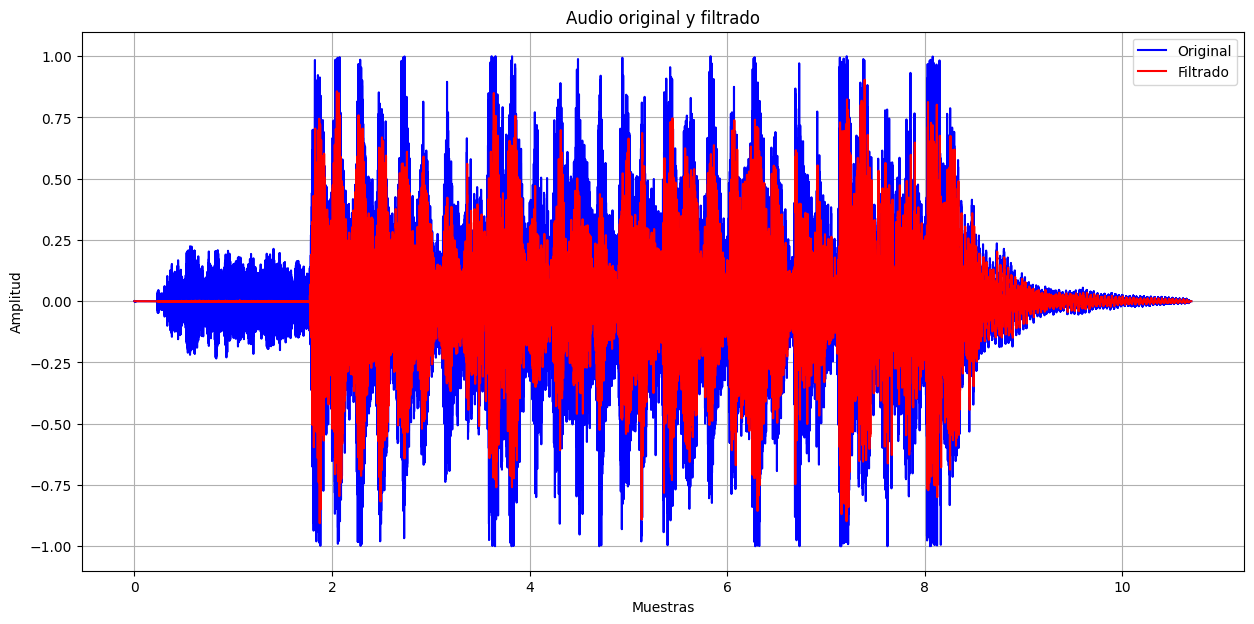

In [130]:
filtered_x = lfilter(taps, 1.0, norm)
plt.figure(figsize=(15,7))
#plt.plot(t,filtered_x)  #graficacion

plt.plot(t,norm, color='blue', label='Original')
plt.plot(t,filtered_x, color='red', label='Filtrado')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Audio original y filtrado')
plt.grid()
plt.show()


Audio(filtered_x,rate=fs1)  #para escuchar la señal si se desea

5. ¿Qué instrumentos logra escuchar en el audio filtrado? ¿Fue posible separar algunos instrumentos? ¿Explique?

La presencia audible del piano, violín y percusión se explica por el comportamiento del filtro, que atenúa las frecuencias más altas, como las notas agudas de campanas y cascabeles, mientras permite el paso de las frecuencias más bajas, como las de la percusión.
esto tambien se logra ver en las graficas

#6.
Repita los  ́ıtems 3 - 6 para frecuencias de corte de 200 Hz y 20000 Hz.

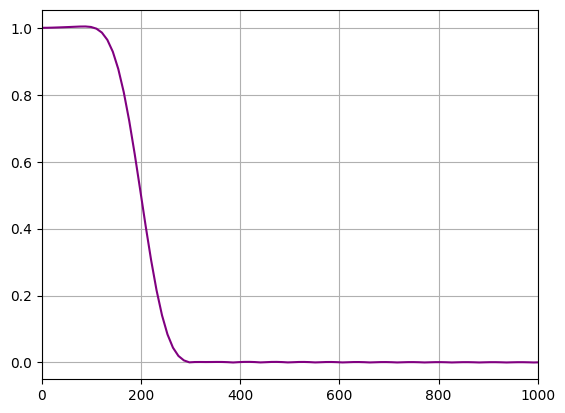

In [141]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
nyq_rate = fs1 / 2.0
roll_off = 200.0
cutoff_hz = 200.0
width = roll_off/nyq_rate
ripple_db = 60.0 #The desired attenuation in the stop band, in dB.
N,_= kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, pass_zero='lowpass')
w, h = freqz(taps, [1], worN=2000)
plt.plot(nyq_rate*w/np.pi, np.abs(h),color='purple')
plt.xlim([0, 1000])
plt.grid()
plt.show()

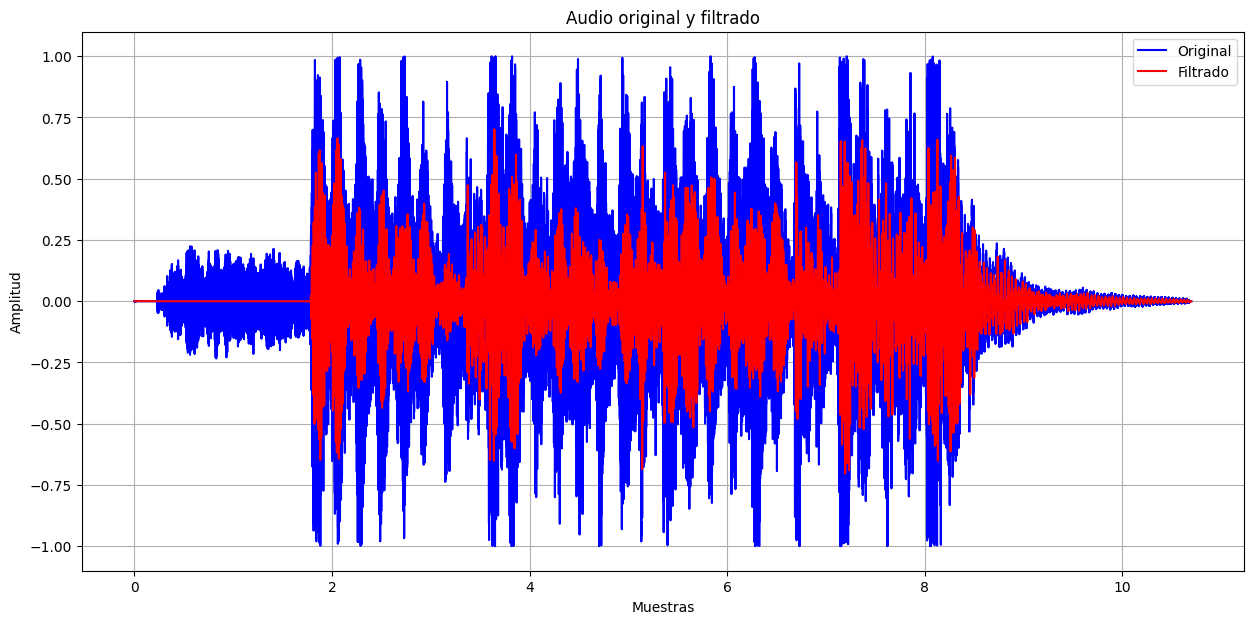

In [142]:
filtered_x = lfilter(taps, 1.0, norm)
plt.figure(figsize=(15,7))
#plt.plot(t,filtered_x)  #graficacion

plt.plot(t,norm, color='blue', label='Original')
plt.plot(t,filtered_x, color='red', label='Filtrado')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Audio original y filtrado')
plt.grid()
plt.show()


Audio(filtered_x,rate=fs1)  #para escuchar la señal si se desea

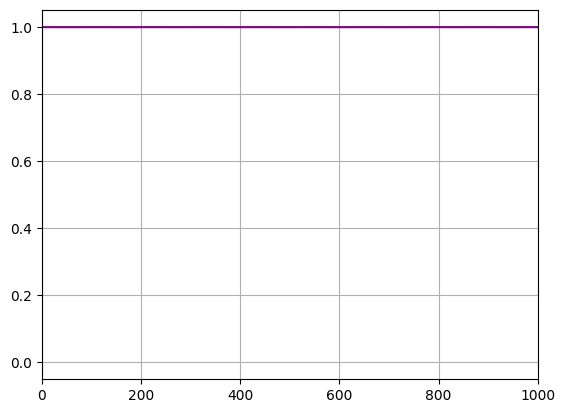

In [144]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
nyq_rate = fs1 / 2.0
roll_off = 200.0
cutoff_hz = 20000.0
width = roll_off/nyq_rate
ripple_db = 60.0 #The desired attenuation in the stop band, in dB.
N,_= kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, pass_zero='lowpass')
w, h = freqz(taps, [1], worN=2000)
plt.plot(nyq_rate*w/np.pi, np.abs(h),color='purple')
plt.xlim([0, 1000])
plt.grid()
plt.show()

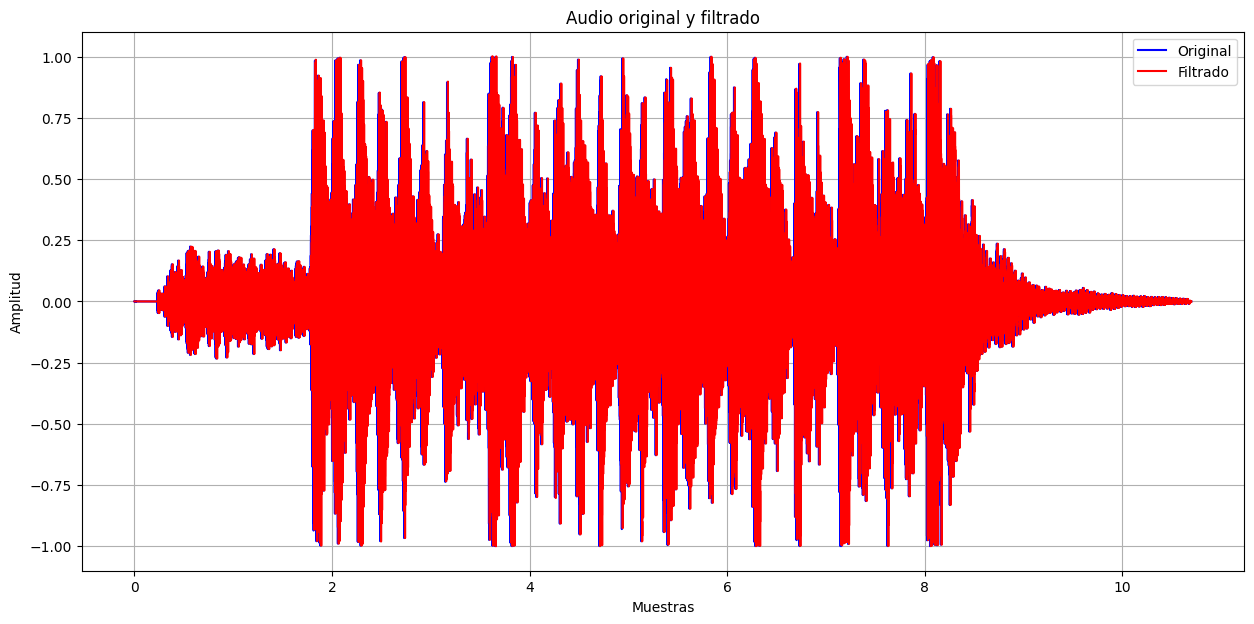

In [145]:
filtered_x = lfilter(taps, 1.0, norm)
plt.figure(figsize=(15,7))
#plt.plot(t,filtered_x)  #graficacion

plt.plot(t,norm, color='blue', label='Original')
plt.plot(t,filtered_x, color='red', label='Filtrado')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Audio original y filtrado')
plt.grid()
plt.show()


Audio(filtered_x,rate=fs1)  #para escuchar la señal si se desea

¿Fue posible separar algunos
instrumentos en estos casos?, explique.

En el caso de la frecuencia de corte igual a 200, no se pueden apreciar los instrumentos,solo un poco de la percusion. Esto pasa ya que al filtrar a una frecuencia muy pequeña pasan muy pocas frecuencias que pueden no estar en el audio


Con la frecuencia de corte igual a 20000 se puede evidenciar todos los intrumentos,esto se debe a que  con una frecuencia mayor se observa que el audio contiene frecuencias mas grandes por esto se puede escuchar, lo que afirma el no poder escuchar nada con 200 Hz

tal y como se ve en la grafica,esta es mayor que la original




* Los filtros FIR son importantes y muy utilizados en el procesamiento de audio y música para efectos de ecualización y eliminación de ruido.

* Utilizar ventanas es fundamental para la creación de los filtros FIR, permitiendo que los bordes sean reducidos a cero lo cual ayuda a mitigar el fenómeno de Gibbs.

* Las frecuencias de corte influyen mucho en el filtrado de audios ya que dependiendo de las frecuencias que tenga el audio se puede escuchar aplicando una frecuencia de corte mayor o menor.

* Un filtro de mayor orden tiene una pendiente de corte más empinada lo que brinda una mayor capacidad para reducir las frecuencias no deseadas, pero tambien aunmenta el costo computacional y tener un filtro de orden muy grande puede causar efectos como la distorsión y el retraso de la señal de salida.